# Bacterial two-component signalling pathways

![](two_signal_pathway.png)
(Systems Biology, Ignals)

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

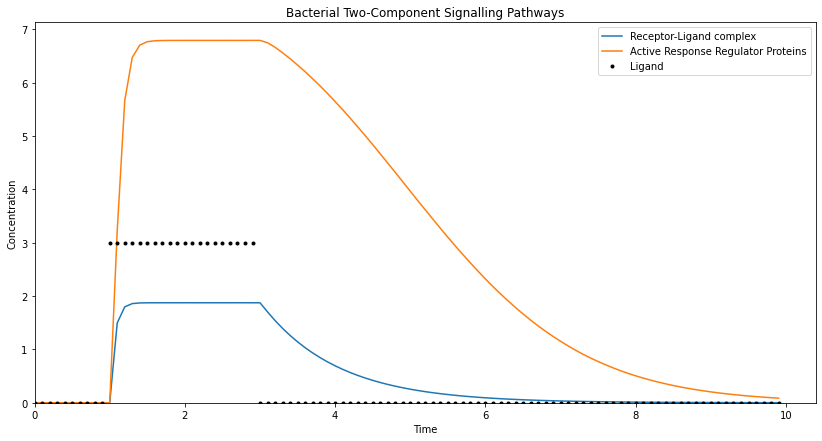

In [52]:
def two_component(t, y, k1f, k1b, k2f, k3f):
    R, RL, P, P_prime = y
    if t < 1:
        L = 0
    elif t >= 1 and t < 3:
        L = 3
    else:
        L = 0
    dR = -k1f*R*L + k1b*RL
    dRL = k1f*R*L - k1b*RL
    dP = -k2f*P*RL + k3f*P_prime
    dP_prime = k2f*P*RL - k3f*P_prime
    return dR, dRL, dP, dP_prime

def output(k1f, k1b, k2f, k3f, init_vals, t_len):
    y0 = init_vals
    ret = solve_ivp(fun=two_component, 
                    t_span=[0, t_len], 
                    t_eval = np.arange(0, t_len, 0.1), 
                    y0 = y0, 
                    args = (k1f, k1b, k2f, k3f), 
                    dense_output=True)
    return ret

def plot_output(k1f, k1b, k2f, k3f, init_vals, t_len, give_vals = False):
    ret_vals = output(k1f, k1b, k2f, k3f, init_vals, t_len)
    R, RL, P, P_prime = ret_vals.y
    plt.figure(figsize = (14, 7))
    # plt.plot(ret_vals.t, R, label = 'R')
    plt.plot(ret_vals.t, RL, label = 'Receptor-Ligand complex')
    # plt.plot(ret_vals.t, P, label = 'P')
    plt.plot(ret_vals.t, P_prime, label = 'Active Response Regulator Proteins')
    plt.plot(ret_vals.t, [3 if i >= 1 and i < 3 else 0 for i in ret_vals.t ], '.k', label = 'Ligand')
    plt.ylabel("Concentration")
    plt.xlabel("Time")
    plt.legend()
    plt.ylim(bottom = 0)
    plt.xlim(left = 0)
    plt.title("Bacterial Two-Component Signalling Pathways")
    plt.show()
    if give_vals:
        return ret_vals
    
model_vals = plot_output(k1f=5, k1b = 1, k2f = 6, k3f = 2, init_vals=[2,0,8,0], t_len = 10, give_vals = True)